In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
data=pd.read_csv("data/StudentsPerformance.csv")

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.shape

(1000, 8)

In [9]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
print(f" Categories in the Gender Column are {data['gender'].unique()}")
print()
print(f" Categories in the race/ethnicity Column are {data['race/ethnicity'].unique()}")
print()
print(f" Categories in the parental level of education Column are {data['parental level of education'].unique()}")
print()
print(f" Categories in the Lunch Column are {data['lunch'].unique()}")
print()
print(f" Categories in the Test preparation course Column are {data['test preparation course'].unique()}")

 Categories in the Gender Column are ['female' 'male']

 Categories in the race/ethnicity Column are ['group B' 'group C' 'group A' 'group D' 'group E']

 Categories in the parental level of education Column are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

 Categories in the Lunch Column are ['standard' 'free/reduced']

 Categories in the Test preparation course Column are ['none' 'completed']


In [16]:
categorical=[feature for feature in data.columns if data[feature].dtype=='O']
numerical=[feature for feature in data.columns if data[feature].dtype!='O']

print(f"There are {len(categorical)} categorical variables in the dataset")
print(f"There are {len(numerical)} numerical variables in the dataset")

There are 5 categorical variables in the dataset
There are 3 numerical variables in the dataset


In [17]:
data['Total Score']=data['math score']+ data['reading score']+data['writing score']
data['Average']=data['Total Score']/len(numerical)

In [18]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [19]:
print(f" The average reading score for all the students {data['reading score'].mean()}")
print(f" The average math score for all the students {data['math score'].mean()}")
print(f" The average writing score for all the students {data['writing score'].mean()}")

 The average reading score for all the students 69.169
 The average math score for all the students 66.089
 The average writing score for all the students 68.054


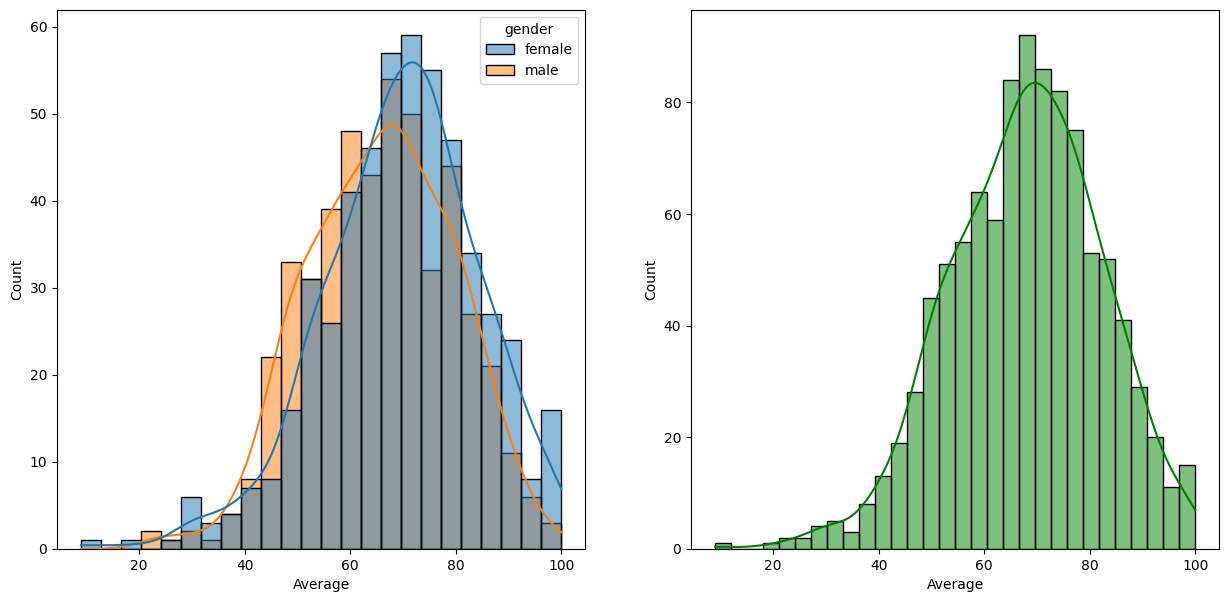

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(122)
sns.histplot(data,x='Average',bins=30,kde=True,color='g')
plt.subplot(121)
sns.histplot(data,x='Average',kde=True,hue='gender')
plt.show()

<Axes: xlabel='Average', ylabel='Count'>

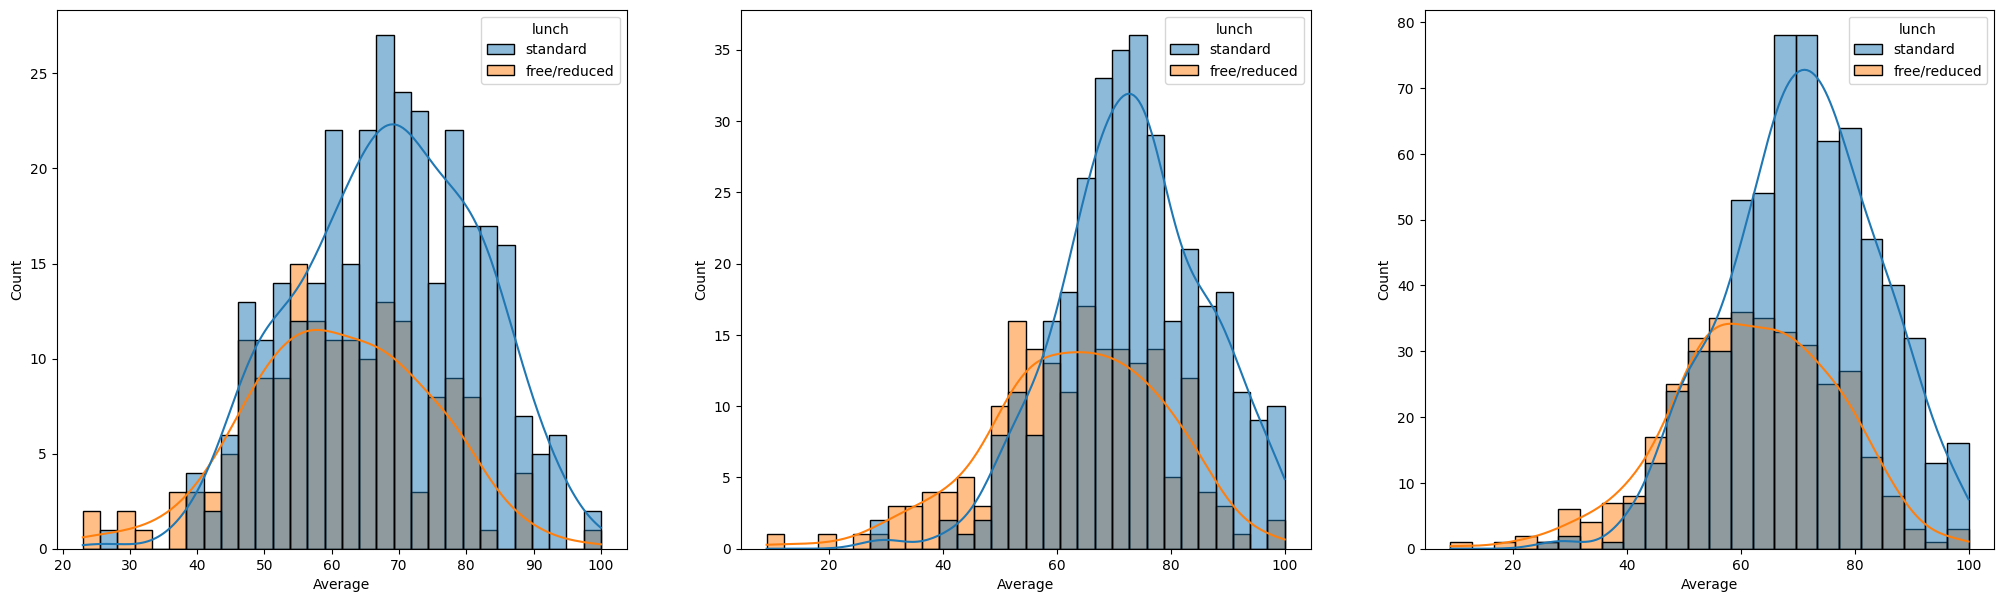

In [21]:
fig,axes=plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data[data.gender=='male'],x='Average',bins=30,kde=True,hue="lunch",hue_order=['standard', 'free/reduced'])
plt.subplot(132)
sns.histplot(data[data.gender=='female'],x='Average',bins=30,kde=True,hue="lunch",hue_order=['standard', 'free/reduced'])
plt.subplot(133)
sns.histplot(data=data,x='Average',kde=True,hue='lunch')

In [22]:
data.groupby('parental level of education')['Average'].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,69.569069,13.670914,31.666667,58.666667,69.666667,79.000000,100.000000
bachelor's degree,118.0,71.923729,13.946609,39.000000,64.083333,71.166667,80.666667,100.000000
high school,196.0,63.096939,13.510583,18.333333,53.916667,65.000000,72.666667,95.666667
master's degree,59.0,73.598870,13.601017,44.666667,63.166667,73.333333,85.500000,97.666667
some college,226.0,68.476401,13.710974,23.333333,60.000000,68.666667,78.000000,99.000000
some high school,179.0,65.108007,14.984078,9.000000,55.666667,66.666667,76.500000,99.000000


In [23]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [24]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [25]:
data.groupby('race/ethnicity')['Average'].describe()

,count,mean,std,min,25%,50%,75%,max
race/ethnicity,,,,,,,,
group A,89.0,62.992509,14.444598,23.333333,52.000000,61.333333,73.000000,96.333333
group B,190.0,65.468421,14.732133,18.333333,56.666667,65.000000,76.833333,96.666667
group C,319.0,67.131661,13.872211,9.000000,57.666667,68.333333,77.000000,98.666667
group D,262.0,69.179389,13.252776,31.000000,60.333333,70.000000,78.583333,99.000000
group E,140.0,72.752381,14.565016,26.000000,64.666667,73.500000,82.416667,100.000000


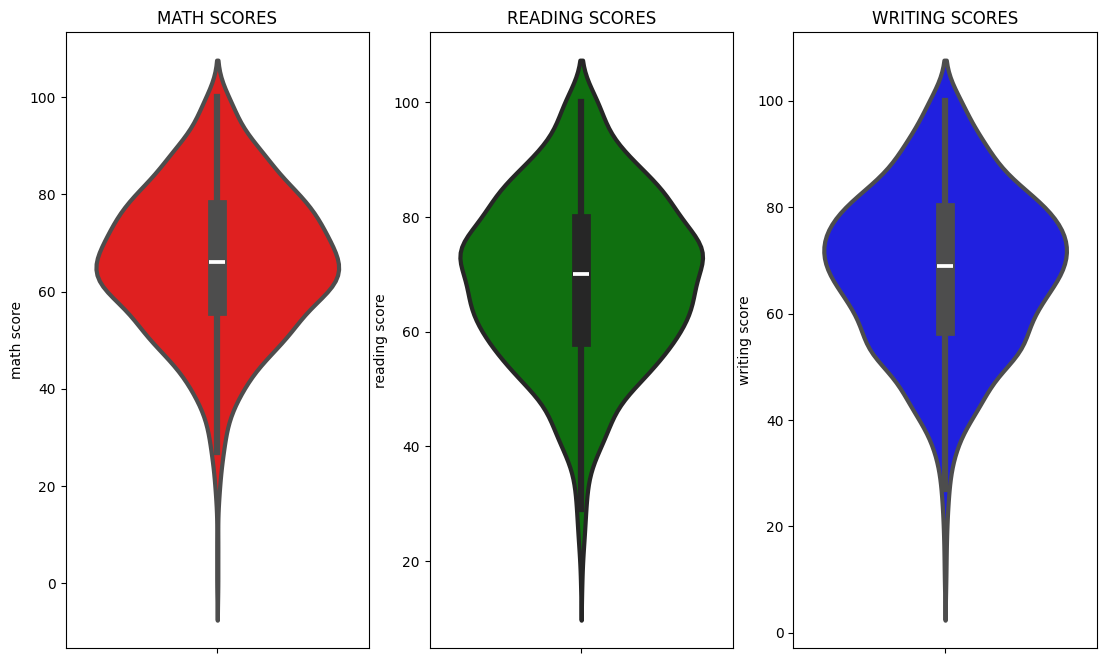

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

<Axes: ylabel='writing score'>

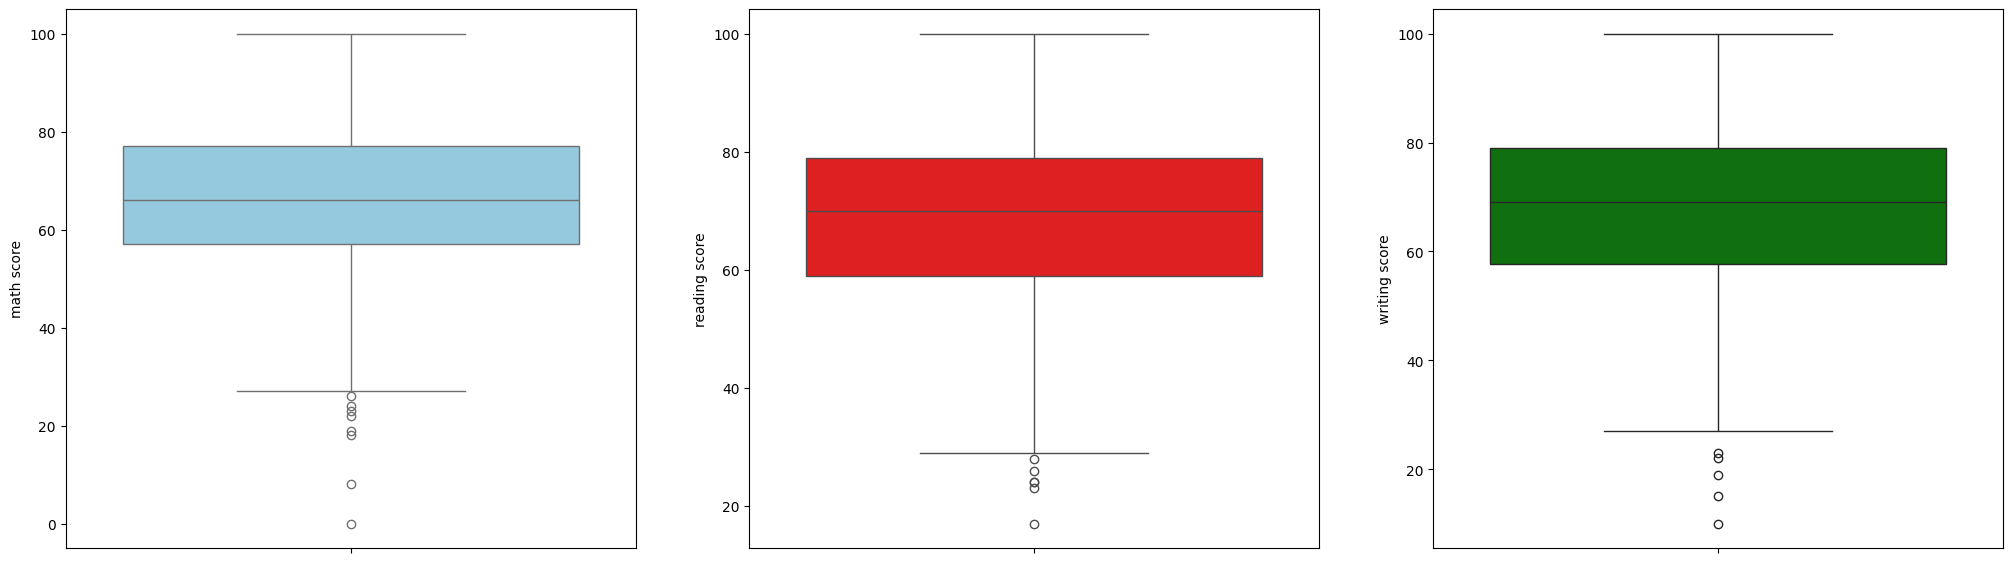

In [27]:
fig,axes=plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(132)
sns.boxplot(data['reading score'],color='red')
plt.subplot(133)
sns.boxplot(data['writing score'],color='green')

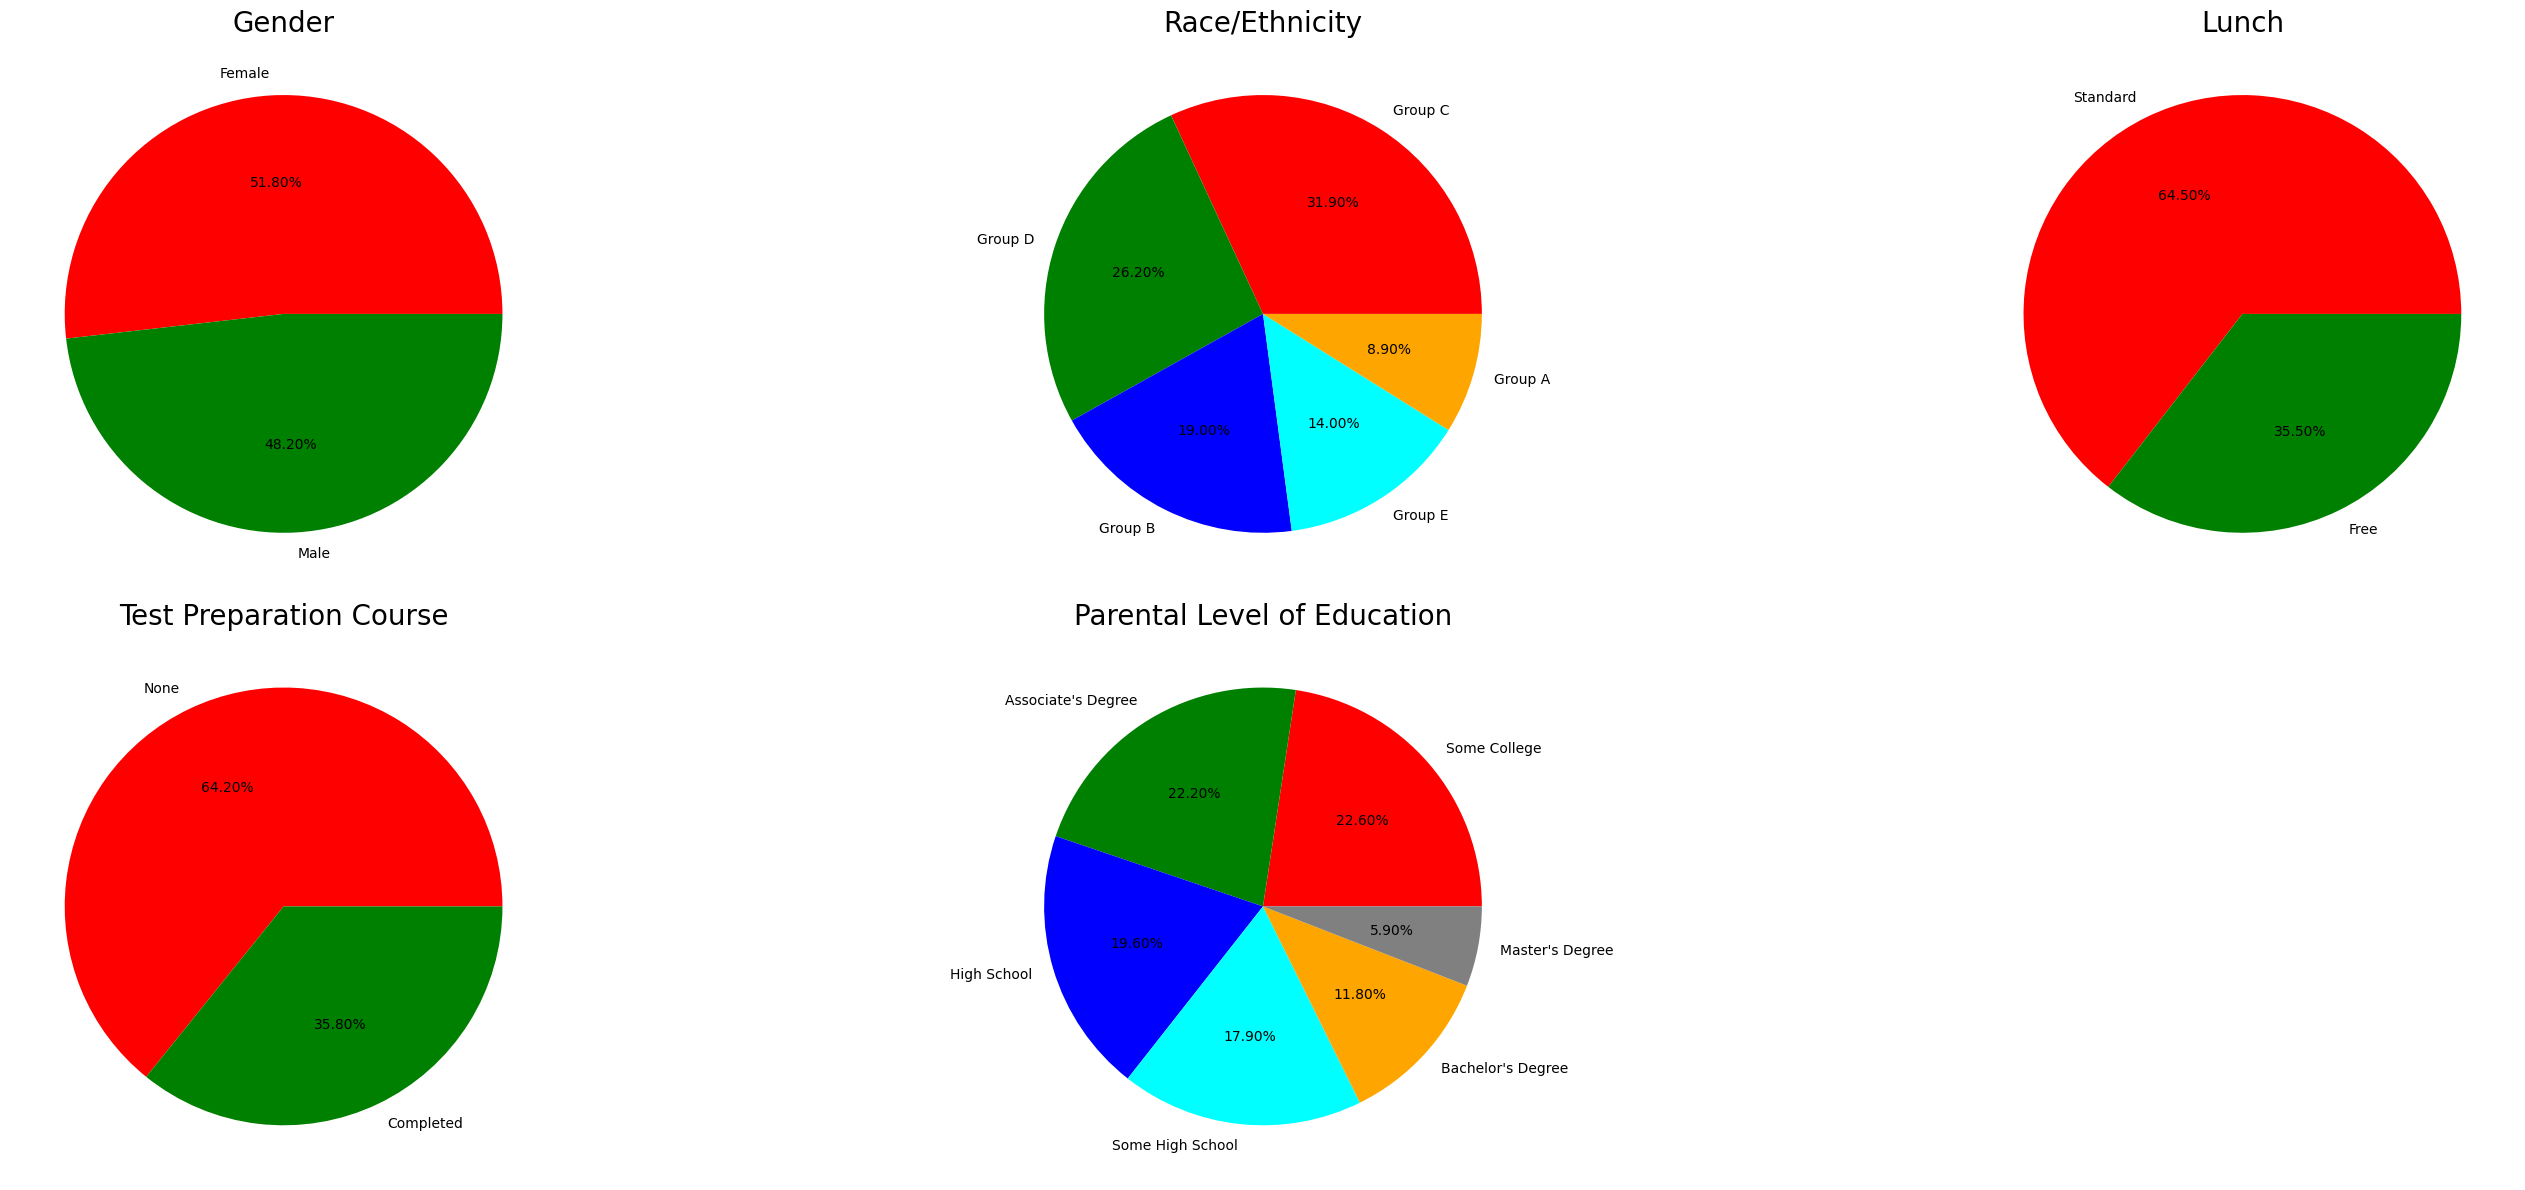

In [28]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(2, 3, 1)
size = data['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = data['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = data['lunch'].value_counts()
labels = ['Standard', 'Free']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 4)
size = data['test preparation course'].value_counts()
labels = ['None', 'Completed']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = data['parental level of education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


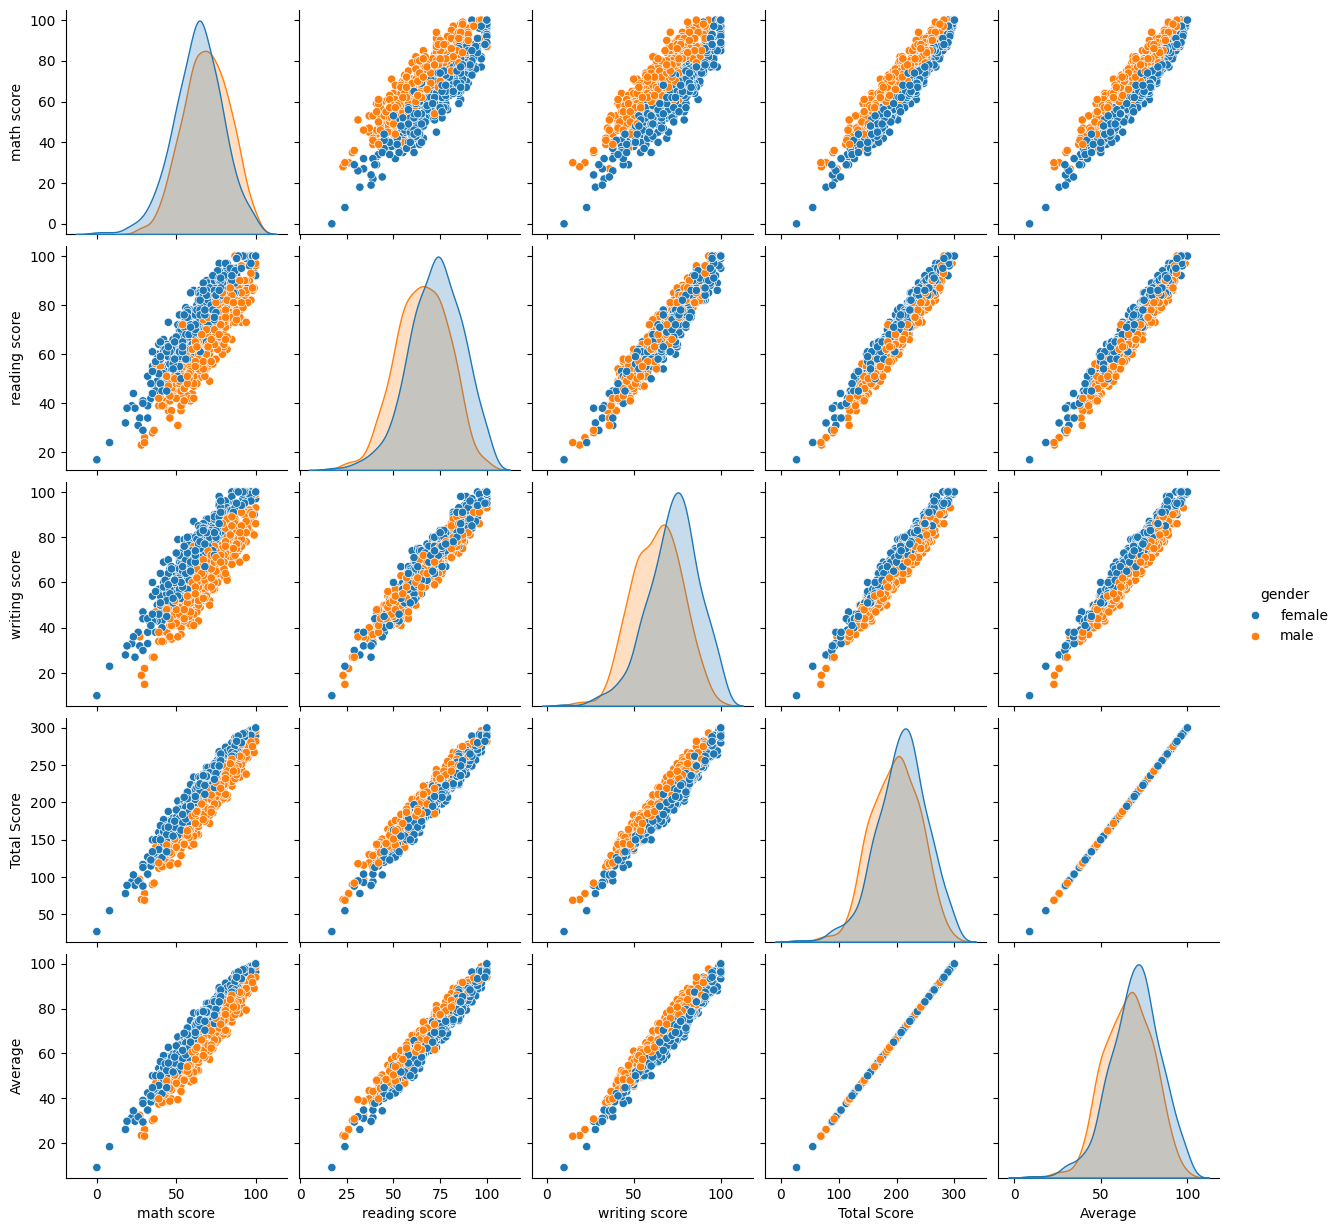

In [29]:
sns.pairplot(data,hue = 'gender')
plt.show()

/var/folders/z2/fgmhrv552919zhk8r3lp0rzh0000gn/T/ipykernel_26757/3230606194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)


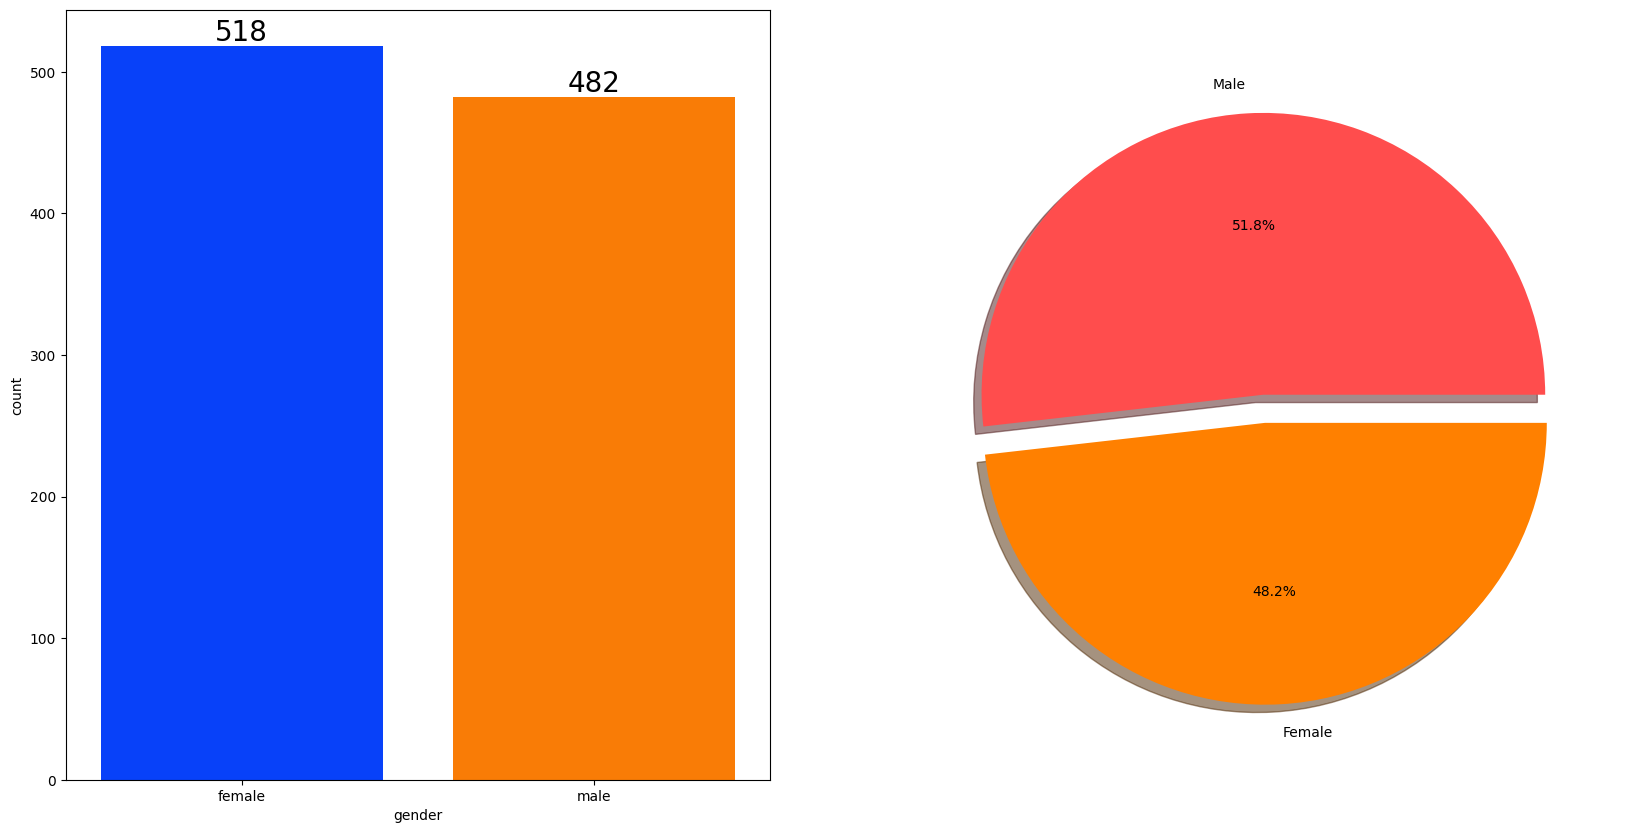

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

<Axes: xlabel='lunch', ylabel='writing score'>

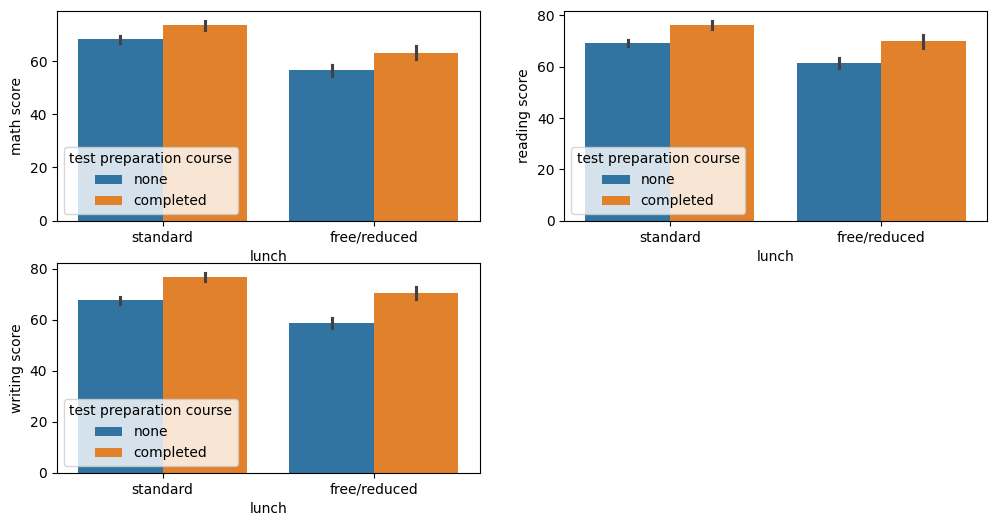

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math score'], hue=data['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading score'], hue=data['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing score'], hue=data['test preparation course'])

/var/folders/z2/fgmhrv552919zhk8r3lp0rzh0000gn/T/ipykernel_26757/1820879454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['race/ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)


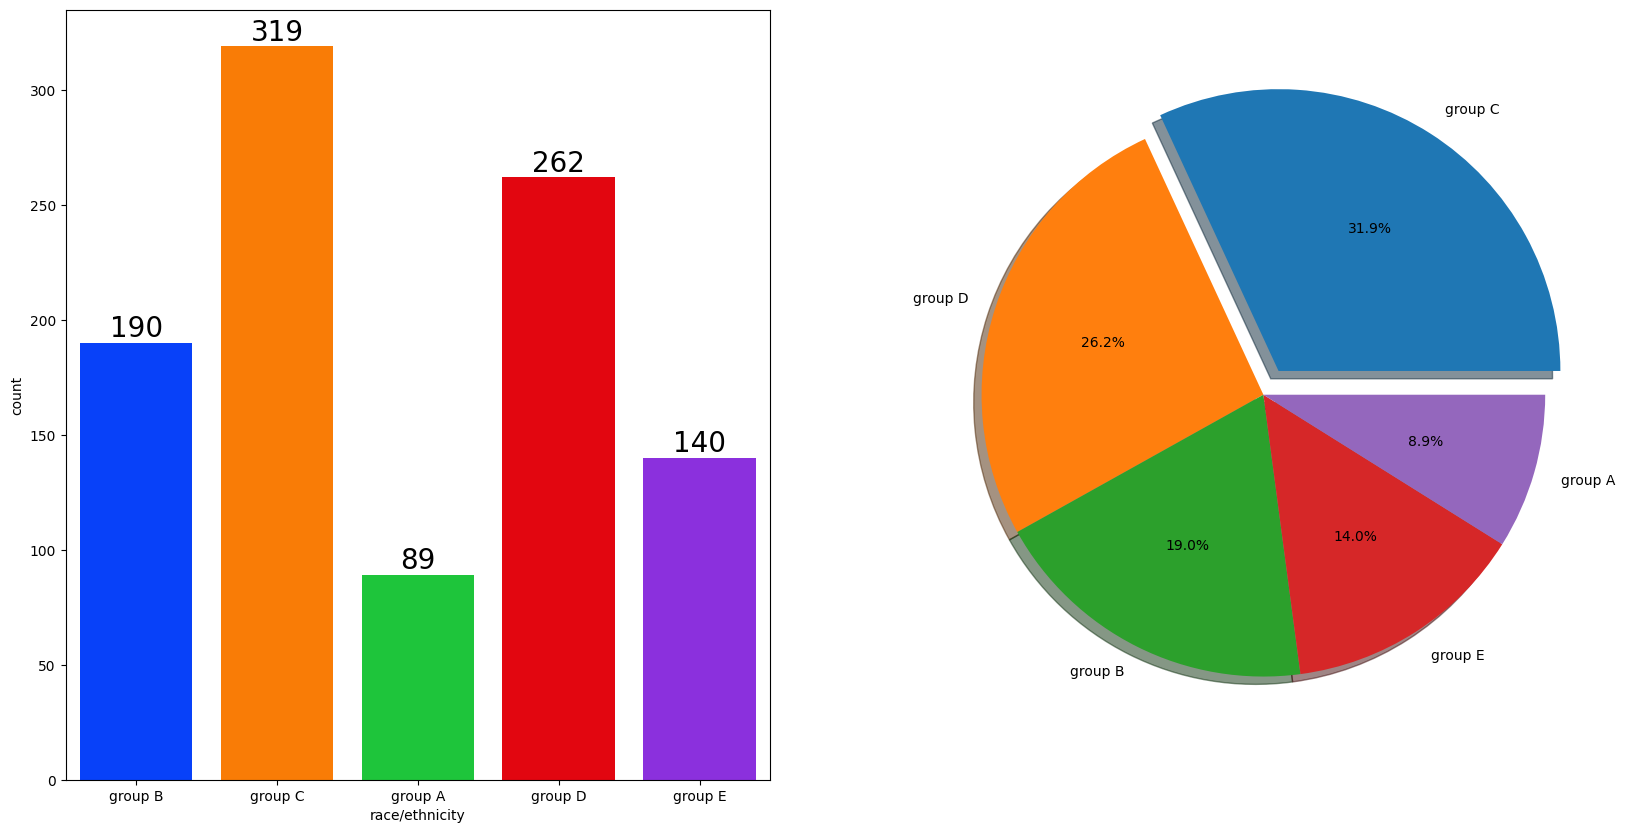

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race/ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race/ethnicity'].value_counts(),labels=data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   